## Exploratory data analysis on Haberman dataset

<div class="alert alert-block alert-info">
<b>Description:</b> Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
</div>

###  Attribute Information:
##### 1. Age - Age of patient at the time of operation (numerical)
##### 2. Year - Patient's year of operation (year - 1900, numerical)
##### 3. Nodes - Number of positive axillary nodes detected (numerical)
### Class label - Survival status 
####               status  1 = The patient survived 5 years or longer 
####               status  2 = The patient died within 5 years

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [83]:
#importing data from pandas
data = pd.read_csv('haberman.csv')

In [84]:
data.head() #displaying top 5 records of the data set

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [85]:
data.shape #this dataset has 306 obersvations and 4 features.

(306, 4)

In [86]:
data.columns #The list of columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

1    225
2     81
Name: status, dtype: int64


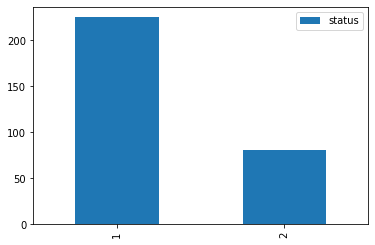

In [87]:
#the status (class label) is the feature of importance in this dataset
print(data.status.value_counts())
data.status.value_counts().plot(kind='bar').legend()

<div class="alert alert-block alert-warning">
<b>Note:</b> The data is highly imbalanced
</div>

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> This shows that the patients survived 5 years or longer is greater than that of those who died within 5 years.
This also shows that the data is highly imbalanced
</div>

### Univariate analysis

<div class="alert alert-block alert-warning">
<b>EDA:</b>Here we are using distribution plots to see how each feature is distributed.
</div>

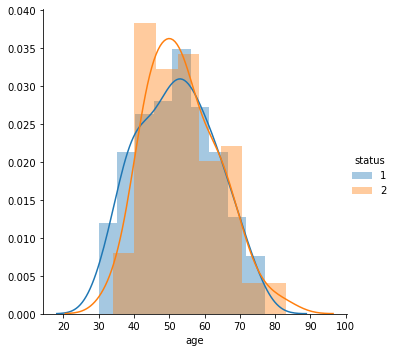

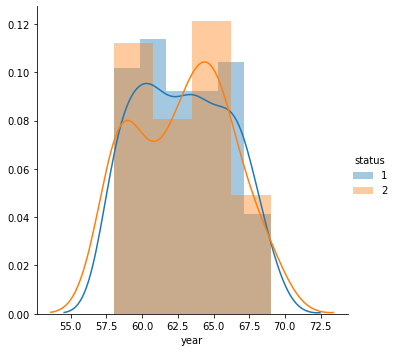

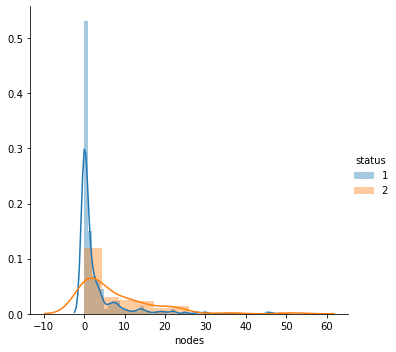

In [88]:
for i in data.columns[0:3]:  
    sns.FacetGrid(data, hue="status", size=5) \
       .map(sns.distplot, i) \
       .add_legend();
plt.show();

### The distribution plot shows:

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> The patients dying within 5 years of surgery is more prevalent between the age range 40-50
</div>

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> The survival and death rates are taking turns for every 2-3 years.
From the data, it is seen that if there is a good survival rate for first two or three years it is following a bad survival rate for the next two or three years
</div>

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> Patients with nodes less than 5 have shown highest survival rates.
In other words, the survival rate declines as the no of positive nodes increase greater than 5.
The increasing nodes are having a negative impact on survival rate
</div>

### A deep dive in distributions using pdf and cdf.

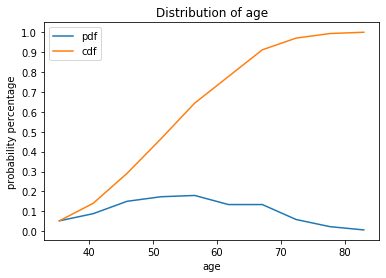

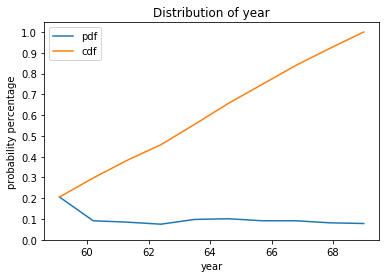

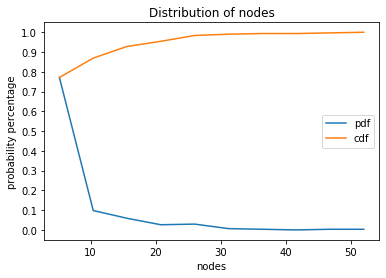

In [89]:
for i in range((data.shape[1])-1):
    counts, bin_edges = np.histogram(data.iloc[:,i], bins=10)
    pdf=counts/sum(counts)
    cdf=np.cumsum(pdf)
    labels=['pdf','cdf']
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.xlabel(data.columns[i])
    plt.ylabel('probability percentage')
    plt.yticks(np.arange(0,1.1,0.1))
    plt.legend(labels)
    plt.title('Distribution of ' +str(data.columns[i]))
    plt.show()

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> The pdf plot of age shows that the maximum patients are between age range of 50-60.
The cdf plot of age shows that almost 90% of the patients are roughly below age of 65
</div>

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> The pdf plot of year shows that there is a downward trend in patients admitted from 64
</div>

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> The pdf plot of nodes shows that patients density distribution having nodes greater than 10 is less than 0.1% for any nodes greater than 10. The probality density is less than 0.1 which means minimal people have nodes >10
The cdf plot of nodes shows that almost 85% of the patients have nodes less than 10
</div>

### Multivariate analysis

#### Using violin plots to compare survival status with the other features. 
#### Violin plot is a kind of hybrid plot that uses pdf and boxplot in it

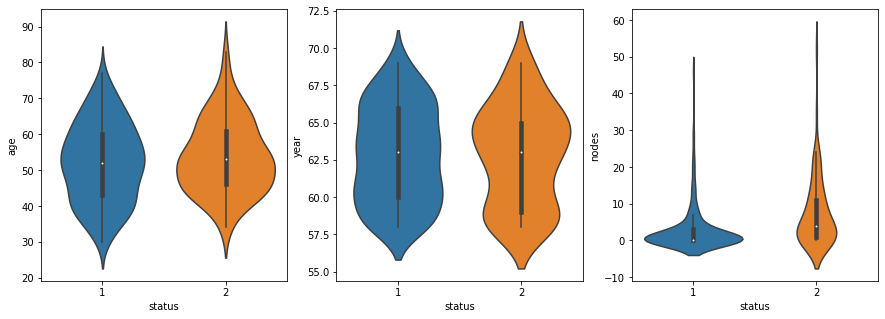

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for j,i in enumerate(data.columns[0:3]):
    sns.violinplot( x='status', y=i, data=data,ax=axes[j])
plt.show()

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> The violin plot of age shows that mortality rate is higher in the age range of 50-60
The violin plot of years shows that people admitted after 1964 have shown high mortality
The violin plot of nodes shows almost 80% of people having nodes less than 5 have shown high survival rate

</div>

Text(0.5, 1.0, 'Nodes vs Survival status')

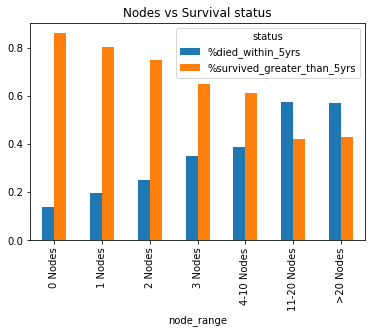

In [91]:
cut_labels=['0 Nodes','1 Nodes','2 Nodes','3 Nodes','4-10 Nodes','11-20 Nodes','>20 Nodes']
cut_bins = [-0.001,0,1,2,3,10,20,60]
data['node_range']=pd.cut(data['nodes'], bins=cut_bins,labels=cut_labels)
d=data.groupby('node_range')['status'].value_counts().unstack()
d['%died_within_5yrs']=d[2]/(d[1]+d[2])
d['%survived_greater_than_5yrs']=1-d['%died_within_5yrs']
d=d.drop(1,axis=1)
d=d.drop(2,axis=1)
d.plot.bar()
plt.title('Nodes vs Survival status')

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> This graph clearly shows that higher the nodes highest is the chance of mortality

</div>

Text(0.5, 1.0, 'Age vs survival status')

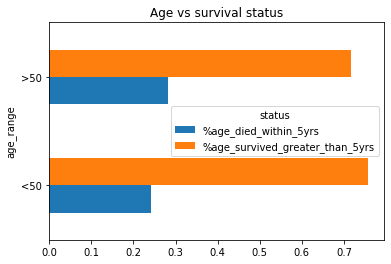

In [92]:
cut_labels=['<50','>50']
cut_bins = [29,50,90]
data['age_range'] = pd.cut(data['age'], bins=cut_bins,labels=cut_labels)
e=data.groupby('age_range')['status'].value_counts().unstack()
e=e.fillna(0)
e['%age_died_within_5yrs']=e[2]/(e[1]+e[2])
e['%age_survived_greater_than_5yrs']=1-e['%age_died_within_5yrs']
e=e.drop([1,2],axis=1)
e.plot.barh(rot=0)
plt.title('Age vs survival status')

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> This graph shows that patients of 
age less than 50 had a high survial rate and low death rate compared to that of patients >50
</div>

### Using box plots to visualize the quantile distributions among the features vs label

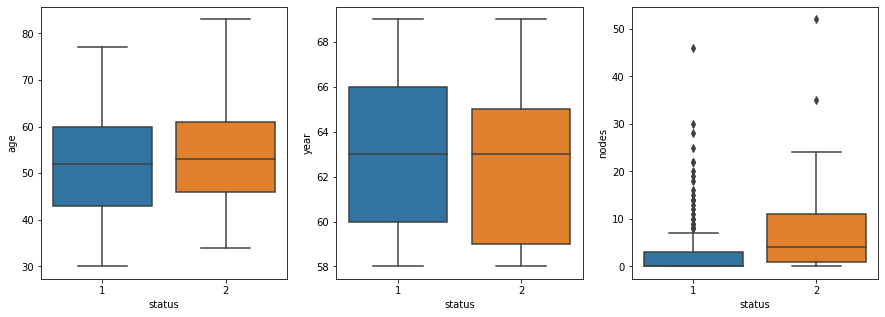

In [93]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for j,i in enumerate(data.columns[0:3]):
    sns.boxplot( x='status', y=i, data=data,ax=axes[j])
plt.show()

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> The box plot of year shows that out of 81 patients died, 75% (61) of the deaths were occured in the first 7 year 1958-1965.
This also implies that out of 81 patients died only 25% (20) patients died in the years 1965-1970
In other words, in last 5 years the patients had shown a good survival rate
</div>

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> The box plot of nodes shows that almost 75% of patients had nodes less than 5
Though the outliers show there are patients with higher nodes survived, it is evident from the other box plot as it says almost 50% of people having nodes greater than 5 showed high death rate
</div>

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> Compared to Age and year plots, it is evident that the nodes plot of patients survived is suffering from outliers.
</div>

### Using Pairplots to visualize and compare in more than 2 dimensions 

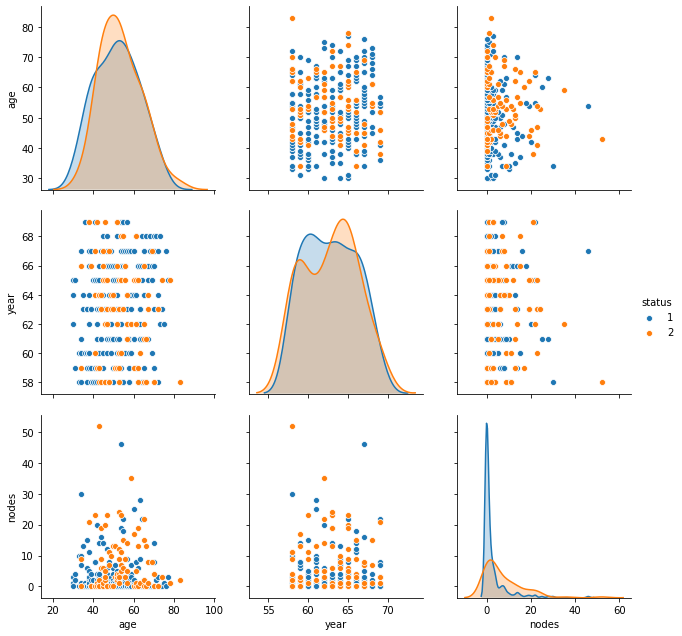

In [94]:
sns.pairplot(data,hue='status',vars=['age','year','nodes'],height=3)

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> The pair plot shows that linear seperability is highly challenging among the features
</div>

### Using heatmaps to find the relationship between features

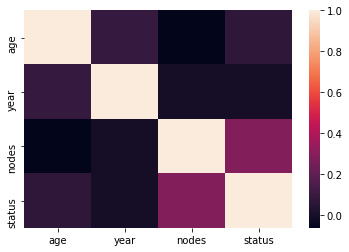

In [95]:
sns.heatmap(data.corr())

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> This shows the features are not much correlated among themselves and the maximum correlation found is between nodes and the survival status which accounts to 0.3 in the scale of 0 to 1
</div>

In [96]:
for i in data.columns[0:3]:
    print('The skewness of ' +str(i) , data[i].skew())
    print('The Kurtosis of ' +str(i) , data[i].kurtosis())
    print('')

The skewness of age 0.14650505649010387
The Kurtosis of age -0.589393038395932

The skewness of year 0.0787548601375535
The Kurtosis of year -1.1188256793703324

The skewness of nodes 2.9838229044308258
The Kurtosis of nodes 11.730876914649611



The skewness of age 0.14650505649010387
The Kurtosis of age -0.589393038395932

The skewness of year 0.0787548601375535
The Kurtosis of year -1.1188256793703324

The skewness of nodes 2.9838229044308258
The Kurtosis of nodes 11.730876914649611



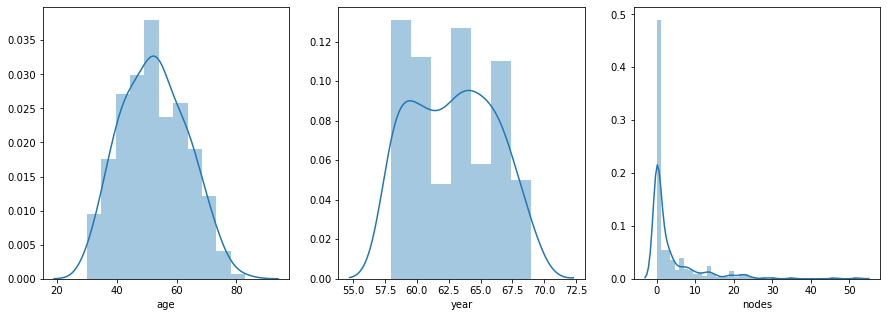

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for j,i in enumerate(data.columns[0:3]):
    sns.distplot(data[i],ax=axes[j])
    print('The skewness of ' +str(i) , data[i].skew())
    print('The Kurtosis of ' +str(i) , data[i].kurtosis())
    print('')
plt.show()

<div class="alert alert-block alert-info">
<b>INFERENCE:</b> From skewness it is inferred that all the features are right skewed and the feature nodes is higly skewed to the right.
The Kurtosis value of 11.7 shows that the Nodes are leptokurtic as the tail is longer on the right side and most of the highest number of nodes are behaving as outliers that's pulling the tail of the distribution to right
</div>